<a href="https://colab.research.google.com/github/charles333george/Multiclass-Dog-Breed-Classification/blob/main/01_Humans_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting our workspace ready

In [2]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [3]:
import os
import cv2 
import imghdr
from matplotlib import pyplot as plt
import numpy as np

### Importing the data

In [4]:
data = "drive/MyDrive/Humans_or_Not"

In [5]:
os.listdir(data)

['Humans', 'Not_Humans', 'Testing']

In [6]:
os.listdir(os.path.join(data, "Humans"))[:5]

['0B699446-ECAE-4A34-96E6-51DE3ECDA3EC Small.jpeg',
 '0a754ad1-4640-4de5-8bbd-5f81dbbf904a Small.jpeg',
 '0A40694B-BB3D-4D5C-8BC6-9B0DBD90C58C Small.jpeg',
 '0A8F2502-6427-4730-9960-4BC7EB3B1D90 Small.jpeg',
 '0e8c3b25-aea6-4523-ba6e-cf42edf63093 Small.jpeg']

In [7]:
for image_class in os.listdir(data):
  for image in os.listdir(os.path.join(data, image_class)):
    image_path = os.path.join(data, image_class, image)

In [8]:
for image_class in os.listdir(data):
  print(image_class)
  #for image in os.listdir(os.path.join(data, image_class)):
    

Humans
Not_Humans
Testing


In [9]:
#tf.keras.utils.image_dataset_from_directory??

In [10]:
data = tf.keras.utils.image_dataset_from_directory("drive/MyDrive/Humans_or_Not") # Buiding a data pipeline

Found 1039 files belonging to 3 classes.


In [11]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
data_iterator = data.as_numpy_iterator() # Access the data pipeline (loop through it)

In [13]:
data_iterator

In [14]:
batch = data_iterator.next() # Grabing one batch back

In [15]:
#len(batch)
#tf.keras.utils.image_dataset_from_directory("drive/MyDrive/Humans_or_Not", batch_size=16, image_size=(128, 128)) # if you want to change a parameter

In [16]:
# Images represented as numpy arrays
batch[0]. shape

(32, 256, 256, 3)

In [17]:
batch[1] # labels

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int32)

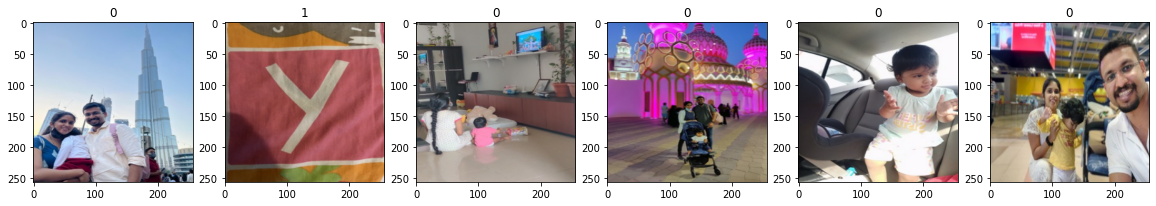

In [18]:
fig, ax = plt.subplots(ncols=6, figsize=(20, 20))
for idx, img in enumerate(batch[0][:6]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

### Scale the data

In [19]:
scaled = data.map(lambda x, y: (x/255.0, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[ 19.5      ,  19.5      ,  21.5      ],
          [ 19.273438 ,  19.273438 ,  19.460938 ],
          [ 33.59375  ,  33.59375  ,  33.382812 ],
          ...,
          [ 91.       ,  55.       ,  21.       ],
          [ 94.11719  ,  58.117188 ,  24.117188 ],
          [ 91.625    ,  55.625    ,  21.625    ]],
 
         [[ 23.75     ,  23.75     ,  25.75     ],
          [ 20.917969 ,  20.917969 ,  21.105469 ],
          [ 34.96875  ,  34.96875  ,  33.28125  ],
          ...,
          [ 94.25781  ,  58.257812 ,  24.257812 ],
          [ 96.109375 ,  60.109375 ,  26.109375 ],
          [ 87.5      ,  51.5      ,  17.5      ]],
 
         [[ 25.       ,  25.       ,  27.       ],
          [ 20.46875  ,  20.46875  ,  20.65625  ],
          [ 34.34375  ,  34.34375  ,  32.65625  ],
          ...,
          [ 94.72656  ,  58.726562 ,  24.726562 ],
          [ 92.41797  ,  56.41797  ,  22.417969 ],
          [ 84.375    ,  48.375    ,  14.375    ]],
 
         ...,
 
         [[ 

### Split the Data

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [22]:
train_size, val_size, test_size

(23, 7, 3)

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [24]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

###Build Deep Learning Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3, 3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, (3, 3), 1, activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(16, (3, 3), 1, activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [28]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [29]:
#tf.optimizers. # list of optimizers

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#### Train

In [31]:
hist

if yhat_new < 0.5:
  print(f"predicte class is human")
else:
  print(f"Predicted calss is not_human")
import tensorflow as tf
tf.__version__
import os
import cv2 
import imghdr
from matplotlib import pyplot as plt
import numpy as np
data = "drive/MyDrive/Humans_or_Not"
os.listdir(data)
os.listdir(os.path.join(data, "Humans"))[:5]
for image_class in os.listdir(data):
  for image in os.listdir(os.path.join(data, image_class)):
    image_path = os.path.join(data, image_class, image)
for image_class in os.listdir(data):
  print(image_class)
  #for image in os.listdir(os.path.join(data, image_class)):
#tf.keras.utils.image_dataset_from_directory??
data = tf.keras.utils.image_dataset_from_directory("drive/MyDrive/Humans_or_Not") # Buiding a data pipeline
data
data_iterator = data.as_numpy_iterator() # Access the data pipeline (loop through it)
data_iterator
batch = data_iterator.next() # Grabing one batch back
#len(batch)
#tf.keras.utils.image_dataset_from_directory("drive/MyDrive/Humans_or_

In [32]:
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train,epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
23/23 [==============================] - 55s 2s/step - loss: 115.2136 - accuracy: 0.5136 - val_loss: 0.7363 - val_accuracy: 0.5134
Epoch 2/20
23/23 [==============================] - 5s 184ms/step - loss: 0.5138 - accuracy: 0.6427 - val_loss: 0.4542 - val_accuracy: 0.7232
Epoch 3/20
23/23 [==============================] - 5s 181ms/step - loss: 0.2946 - accuracy: 0.7785 - val_loss: 0.7525 - val_accuracy: 0.7768
Epoch 4/20
23/23 [==============================] - 5s 179ms/step - loss: 0.0450 - accuracy: 0.8764 - val_loss: 0.1245 - val_accuracy: 0.8259
Epoch 5/20
23/23 [==============================] - 5s 183ms/step - loss: -0.4048 - accuracy: 0.8546 - val_loss: 0.7834 - val_accuracy: 0.7500
Epoch 6/20
23/23 [==============================] - 5s 180ms/step - loss: 0.1961 - accuracy: 0.8139 - val_loss: 1.6265 - val_accuracy: 0.7500
Epoch 7/20
23/23 [==============================] - 5s 180ms/step - loss: -0.8420 - accuracy: 0.8207 - val_loss: 0.2959 - val_accuracy: 0.7589
Epoc

In [33]:
hist.history

{'loss': [115.213623046875,
  0.5138221979141235,
  0.2945500314235687,
  0.04501769319176674,
  -0.4047631025314331,
  0.1961173564195633,
  -0.8420363664627075,
  -2.5420005321502686,
  -3.779869794845581,
  -10.309041023254395,
  -20.686227798461914,
  -51.732810974121094,
  -157.39906311035156,
  -485.8975830078125,
  -1425.0211181640625,
  -3348.66943359375,
  -6893.59521484375,
  -16858.578125,
  -55491.6484375,
  -152041.640625],
 'accuracy': [0.5135869383811951,
  0.6426630616188049,
  0.7785326242446899,
  0.876358687877655,
  0.854619562625885,
  0.813858687877655,
  0.820652186870575,
  0.82472825050354,
  0.8274456262588501,
  0.8274456262588501,
  0.8165760636329651,
  0.86548912525177,
  0.832880437374115,
  0.79347825050354,
  0.8682065010070801,
  0.83152174949646,
  0.8790760636329651,
  0.8464673757553101,
  0.83152174949646,
  0.873641312122345],
 'val_loss': [0.7362608909606934,
  0.4542180895805359,
  0.7524849772453308,
  0.12454167753458023,
  0.7834315299987793,

#### Plot Performance

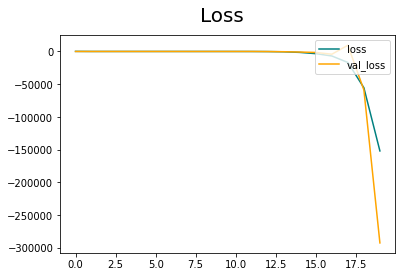

In [34]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper right")
plt.show()

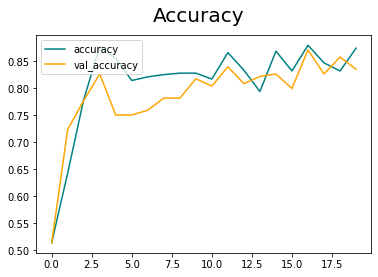

In [35]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluating performance

#### Evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
len(test)

3

In [39]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 218ms/step


In [40]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result()}")

Precision:0.8333333134651184, Recall:0.930232584476471, Accuracy:0.8607594966888428


####Test

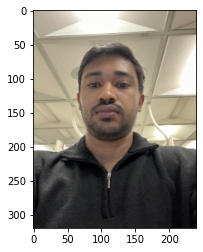

In [41]:
img = cv2.imread("/content/drive/MyDrive/Humans_or_Not/Testing/humans/IMG_3645 Small.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

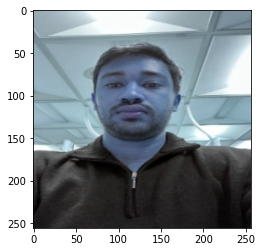

In [42]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
resize.shape

TensorShape([256, 256, 3])

In [44]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [45]:
yhat = model.predict(np.expand_dims(resize/255.0, 0))

1/1 [==============================] - 0s 83ms/step


In [46]:
yhat

array([[1.]], dtype=float32)

In [47]:
if yhat < 0.5:
  print("Predicted class is Human")
else:
  print("Predicted class is not_human")

Predicted class is not_human


### Save the Model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join("models", "HumansOrNot.h5"))

In [50]:
new_model = load_model(os.path.join("models", "HumansOrNot.h5"))

In [51]:
new_model.predict(np.expand_dims(resize/255.0, 0))

1/1 [==============================] - 0s 67ms/step


array([[1.]], dtype=float32)

In [52]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [53]:
if yhat_new < 0.5:
  print(f"predicte class is human")
else:
  print(f"Predicted calss is not_human")

Predicted calss is not_human
